Sampling rate: 160.0 Hz
Channels: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
Signal shape: (64, 20000)


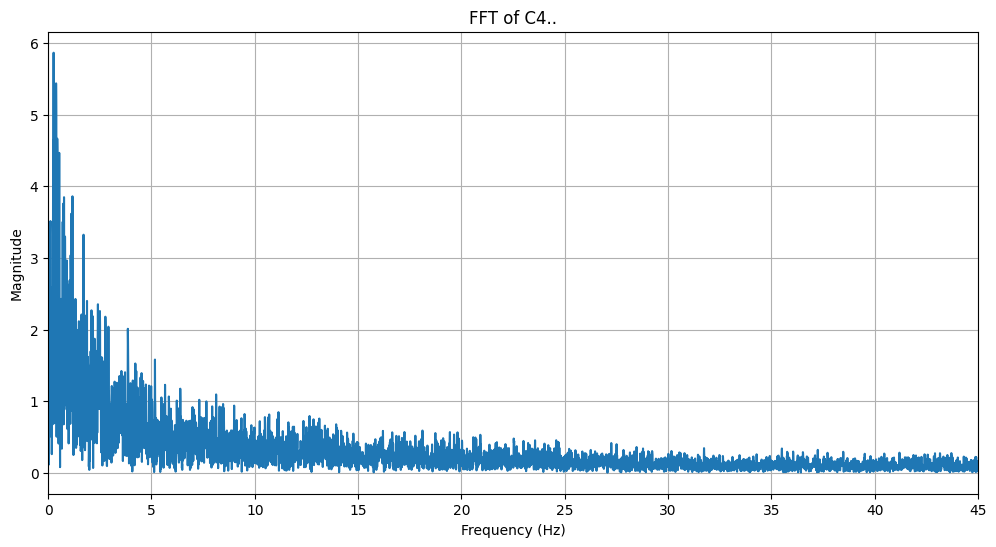

In [17]:
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt

# Load the EDF file
path = "S001R03.edf"
signals, signal_headers, header = highlevel.read_edf(path)
fs = signal_headers[0]['sample_frequency']  # Sampling rate (Hz)
channel_names = [h['label'] for h in signal_headers]  # List of channel names

print(f"Sampling rate: {fs} Hz")
print(f"Channels: {channel_names}")
print(f"Signal shape: {signals.shape}")  # (n_channels, n_samples)

# Select a channel to analyze (change index as needed)
channel_idx = channel_names.index('C4..')  # First channel
signal = signals[channel_idx]
channel_name = channel_names[channel_idx]

# Optional: Apply a window function to reduce spectral leakage
window = np.hanning(len(signal))
windowed_signal = signal * window

# Compute FFT
n = len(signal)
fft_result = np.fft.fft(windowed_signal)  # Using windowed signal
fft_magnitude = np.abs(fft_result)[:n//2] * 2 / n  # Take half and normalize
fft_magnitude[0] /= 2  # DC component shouldn't be doubled

# Create frequency axis
freqs = np.fft.fftfreq(n, 1/fs)[:n//2]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(freqs, fft_magnitude)
plt.title(f'FFT of {channel_name}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 45)  # Show up to Nyquist frequency - fs/2
plt.show()


Sampling rate: 160.0 Hz
Channels: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
Signal shape: (64, 20000)


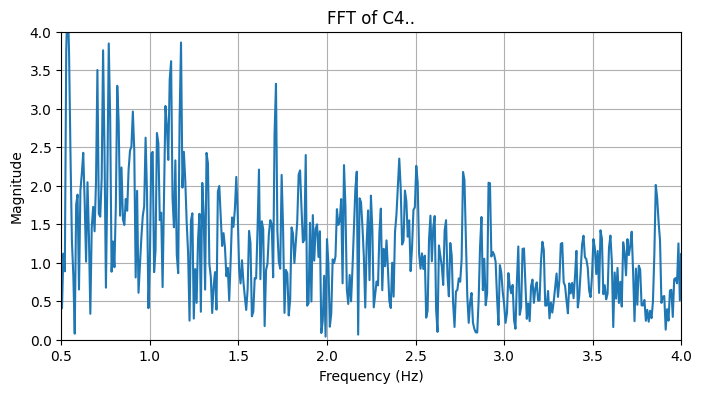

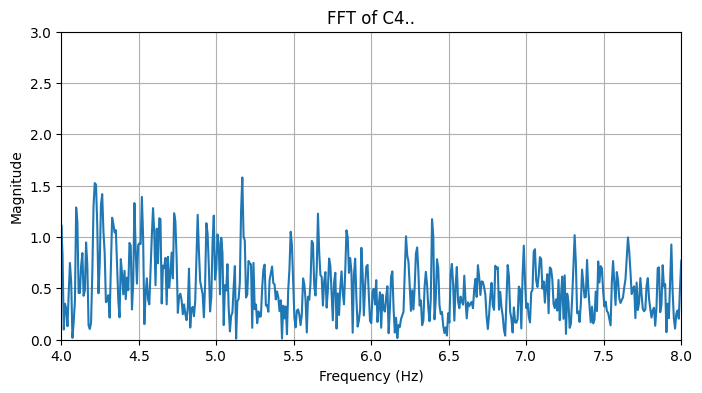

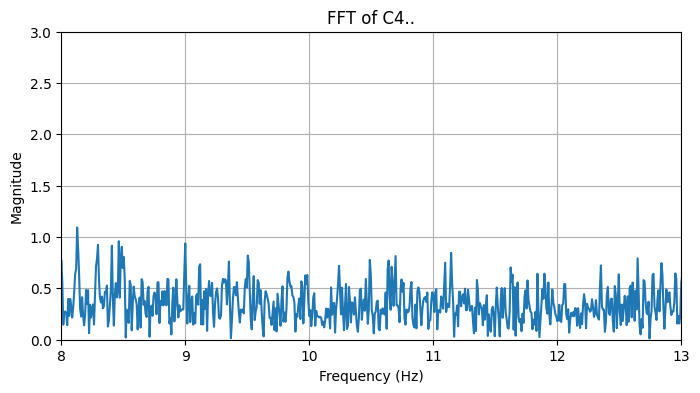

In [34]:
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt

# Load the EDF file
path = "S001R03.edf"
signals, signal_headers, header = highlevel.read_edf(path)
fs = signal_headers[0]['sample_frequency']  # Sampling rate (Hz)
channel_names = [h['label'] for h in signal_headers]  # List of channel names

print(f"Sampling rate: {fs} Hz")
print(f"Channels: {channel_names}")
print(f"Signal shape: {signals.shape}")  # (n_channels, n_samples)

# Select a channel to analyze (change index as needed)
channel_idx = channel_names.index('C4..')  # First channel
signal = signals[channel_idx]
channel_name = channel_names[channel_idx]

# Optional: Apply a window function to reduce spectral leakage
window = np.hanning(len(signal))
windowed_signal = signal * window

# Compute FFT
n = len(signal)
fft_result = np.fft.fft(windowed_signal)  # Using windowed signal
fft_magnitude = np.abs(fft_result)[:n//2] * 2 / n  # Take half and normalize
fft_magnitude[0] /= 2  # DC component shouldn't be doubled

# Create frequency axis
freqs = np.fft.fftfreq(n, 1/fs)[:n//2]

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(freqs, fft_magnitude)
plt.title(f'FFT of {channel_name}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0.5, 4)  # Show up to Nyquist frequency - fs/2
plt.ylim(0, 4)

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(freqs, fft_magnitude)
plt.title(f'FFT of {channel_name}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(4, 8)  # Show up to Nyquist frequency - fs/2
plt.ylim(0, 3)

plt.figure(figsize=(8, 4))
plt.plot(freqs, fft_magnitude)
plt.title(f'FFT of {channel_name}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(8, 13)  # Show up to Nyquist frequency - fs/2
plt.ylim(0, 3)
plt.show()

Sampling rate: 160.0 Hz
Channels: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


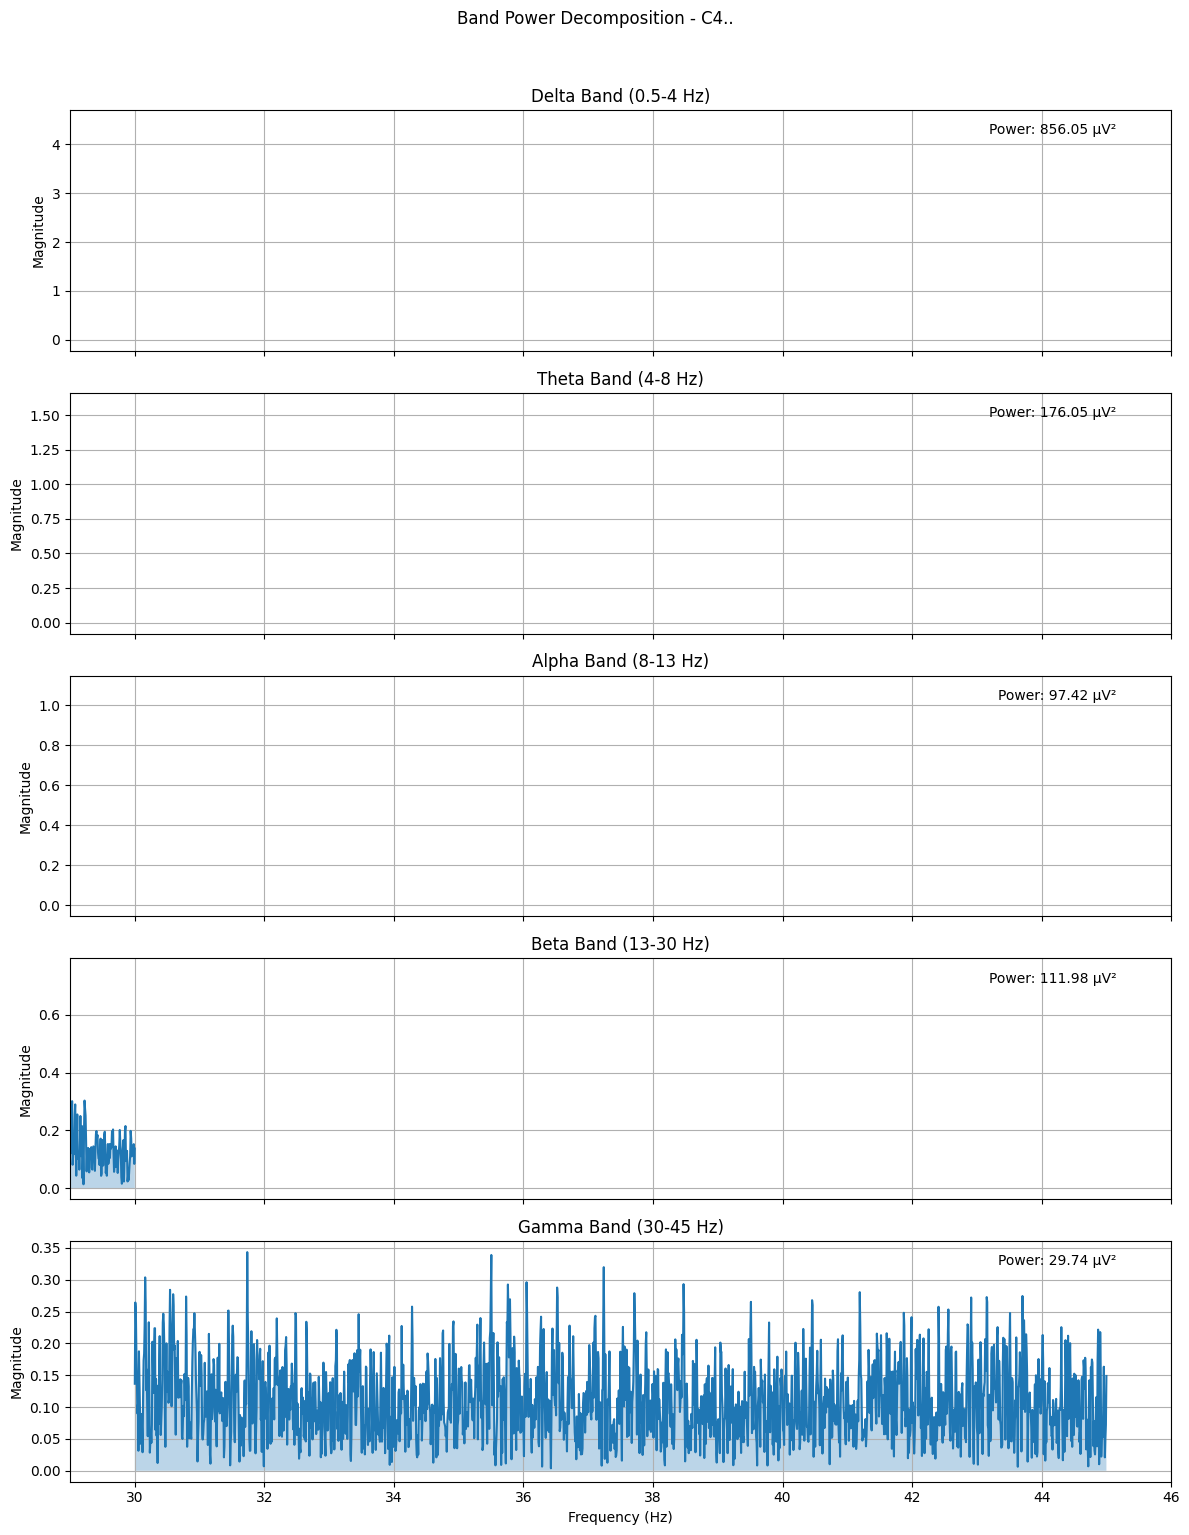

In [ ]:
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 45)
}

Sampling rate: 160.0 Hz
Channels: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


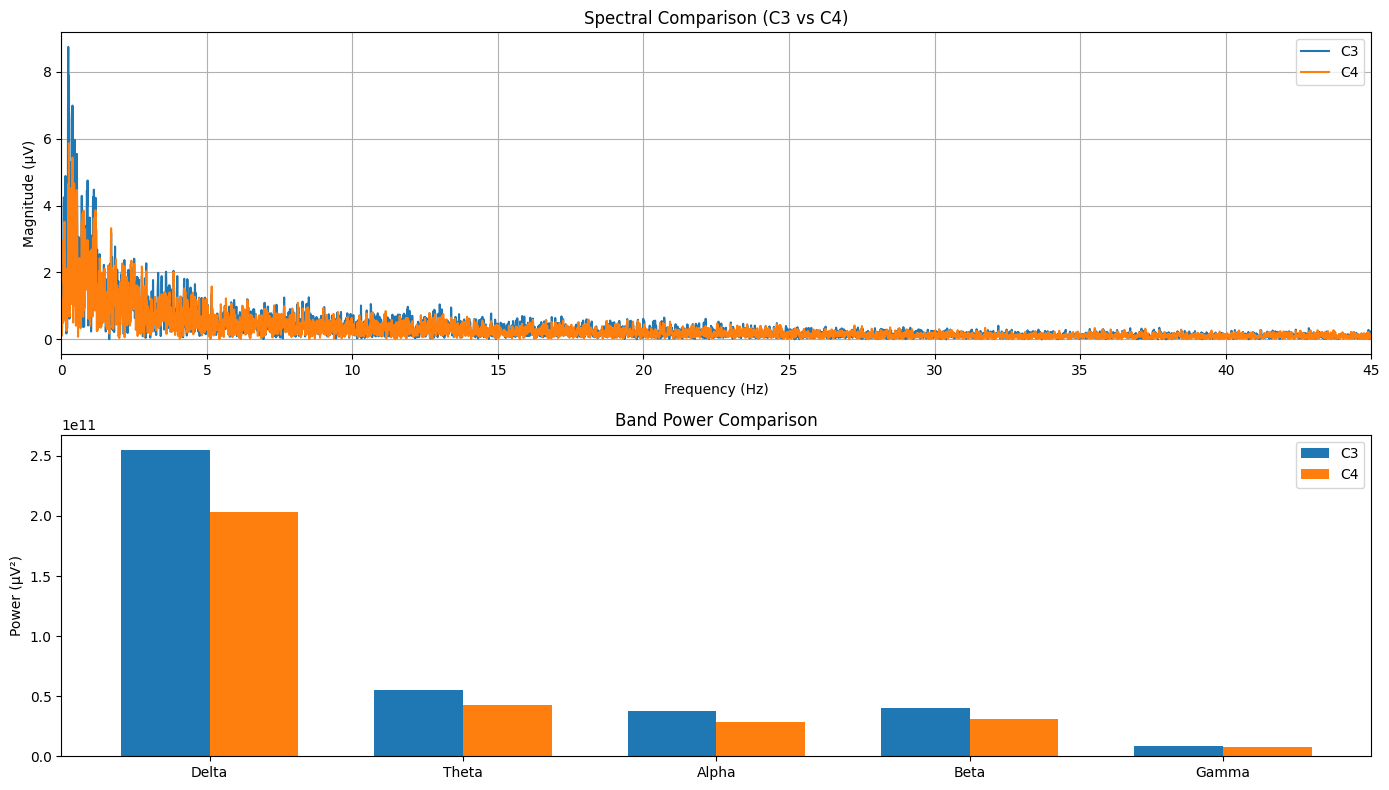


Laterality Indices (%):
Delta: -11.2%
Theta: -13.3%
Alpha: -14.1%
Beta: -12.4%
Gamma: -7.0%

No significant alpha asymmetry detected


In [15]:
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load the EDF file
path = "S001R03.edf"
signals, signal_headers, header = highlevel.read_edf(path)
fs = signal_headers[0]['sample_frequency']  # Sampling rate (Hz)
channel_names = [h['label'] for h in signal_headers]  # List of channel names

print(f"Sampling rate: {fs} Hz")
print(f"Channels: {channel_names}")

def bandpower(data, sf, band):
    """Calculate power in specific frequency band"""
    band = np.asarray(band)
    freqs = np.fft.fftfreq(len(data), 1/sf)
    fft_vals = np.abs(np.fft.fft(data))
    idx = np.where((freqs >= band[0]) & (freqs <= band[1]))[0]
    return np.sum(fft_vals[idx]**2)

def analyze_channel(signal, fs, ch_name):
    """Perform spectral analysis for a single channel"""
    window = np.hanning(len(signal))
    windowed_signal = signal * window
    
    n = len(signal)
    fft_result = np.fft.fft(windowed_signal)
    fft_magnitude = np.abs(fft_result)[:n//2] * 2 / n
    fft_magnitude[0] /= 2
    freqs = np.fft.fftfreq(n, 1/fs)[:n//2]
    
    # Calculate band powers
    bands = {
        'Delta': (0.5, 4),
        'Theta': (4, 8),
        'Alpha': (8, 13),
        'Beta': (13, 30),
        'Gamma': (30, 45)
    }
    
    band_powers = {}
    for band, (low, high) in bands.items():
        band_powers[band] = bandpower(signal, fs, [low, high])
    
    return freqs, fft_magnitude, band_powers

# Analyze both channels
c3_idx = channel_names.index('C3..')
c4_idx = channel_names.index('C4..')

freqs_c3, mag_c3, bp_c3 = analyze_channel(signals[c3_idx], fs, 'C3')
freqs_c4, mag_c4, bp_c4 = analyze_channel(signals[c4_idx], fs, 'C4')

# Plot comparison
plt.figure(figsize=(14, 8))

# Spectral plot
plt.subplot(2, 1, 1)
plt.plot(freqs_c3, mag_c3, label='C3')
plt.plot(freqs_c4, mag_c4, label='C4')
plt.title('Spectral Comparison (C3 vs C4)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (µV)')
plt.grid(True)
plt.xlim(0, 45)
plt.legend()

# Band power comparison
plt.subplot(2, 1, 2)
x = np.arange(len(bp_c3))
width = 0.35
plt.bar(x - width/2, bp_c3.values(), width, label='C3')
plt.bar(x + width/2, bp_c4.values(), width, label='C4')
plt.xticks(x, bp_c3.keys())
plt.title('Band Power Comparison')
plt.ylabel('Power (µV²)')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate laterality indices
def laterality_index(left, right):
    return (right - left) / (right + left) * 100

print("\nLaterality Indices (%):")
for band in bp_c3.keys():
    li = laterality_index(bp_c3[band], bp_c4[band])
    print(f"{band}: {li:.1f}%")
    
# Interpretation
alpha_li = laterality_index(bp_c3['Alpha'], bp_c4['Alpha'])
if abs(alpha_li) > 15:  # Significant asymmetry threshold
    print(f"\nSignificant alpha asymmetry ({alpha_li:.1f}%)")
    if alpha_li > 0:
        print("Right hemisphere dominance (C4 > C3)")
    else:
        print("Left hemisphere dominance (C3 > C4)")
else:
    print("\nNo significant alpha asymmetry detected")